# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading the dataset

In [2]:
df = pd.read_csv('loan.csv')

## Number of rows, number of columns and descriptive information about the dataset

### Number of rows and columns

In [3]:
df.shape

(39717, 111)

- The data set has 39717 rows and 111 columns

#### Data types of columns, column names, and number of non-null values in each column

In [4]:
df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Observation

- There are few columns that have all null values. These columns have to be removed.
- int_rate column stands for interest_rate of the loan. The datatype of the column is object where as it should be float. This needs to be handled


# Data Cleaning



## Handling missing values


In [7]:
null_value_counts = pd.DataFrame(df.isnull().sum())
null_value_counts.columns = ['count_of_null_values']
null_value_counts['percentage'] = (null_value_counts['count_of_null_values']/df.shape[0])*100
null_value_counts[null_value_counts['count_of_null_values']>0].sort_values(by='percentage', ascending=False).head(68)

,count_of_null_values,percentage
bc_open_to_buy,39717,100.000000
acc_open_past_24mths,39717,100.000000
bc_util,39717,100.000000
mo_sin_old_il_acct,39717,100.000000
mo_sin_old_rev_tl_op,39717,100.000000
mo_sin_rcnt_rev_tl_op,39717,100.000000
mo_sin_rcnt_tl,39717,100.000000
mort_acc,39717,100.000000
mths_since_recent_bc,39717,100.000000
mths_since_recent_bc_dlq,39717,100.000000


### Observation

- There are many variables with 100% of the values as null. We need to remove these variables.
- Also, the columns with more than 50% null values also need to be removed as we cannot impute so many values.

In [10]:
null_value_counts[null_value_counts['percentage']==100].shape[0]

54

- There are 54 columns where all the values are null.

In [11]:
null_value_counts[(null_value_counts['percentage']>50)&(null_value_counts['percentage']<100)].shape[0]

3

There are 3 columns where null values consititute more than 50% of the column values.

Removing the columns with high null value count


In [12]:
null_column_list = list(null_value_counts[null_value_counts['percentage']>50].index)
filtered_null_columns_df = df.drop(null_column_list, axis=1)
filtered_null_columns_df.shape

(39717, 54)

After removing the columns with high null value count, we have 54 columns that need to be analysed

### Inspecting few columns values

In [13]:
filtered_null_columns_df.delinq_amnt.value_counts()


0    39717
Name: delinq_amnt, dtype: int64

In [14]:
filtered_null_columns_df.tax_liens.value_counts()


0.0    39678
Name: tax_liens, dtype: int64

- As we can see, there are few columns which have only 1 distinct value. We need to check how many such columns are there in the dataset and remove them as they do not add value to the analysis.

#### Number of columns with one value in the entire column


In [16]:
unique_value_counts = pd.Series()
for col in filtered_null_columns_df.columns:
    unique_count = filtered_null_columns_df[col].nunique()
    unique_value_counts[col] = unique_count

In [17]:
unique_value_counts[unique_value_counts==1]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

As we can see that there are 9 columns with only 1 unique value. These columns are to be removed as they will not add any value to our analysis

In [18]:
single_unique_value_column_list = list(unique_value_counts[unique_value_counts==1].index)

In [19]:
filtered_null_columns_df.drop(single_unique_value_column_list, axis=1, inplace=True)

In [20]:
filtered_null_columns_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### Inspecting columns and their significance.


In the above list of columns, one of the important columns is 'last_credit_pull_date'. This is the date when the credit bureau record was pulled by the lending institution. It contains the historical credit data of the customer. Based on the information provided in the credit bureau data, the decision to disburse a loan is made.
It is important to note that, the credit_pull_date and disbursal date should be close. If they are not close, then the data cannot be considered for analysis purposes as this data may not have been used for making the decision to lend to the customer

In [21]:
filtered_null_columns_df[['id', 'last_credit_pull_d', 'issue_d']].head()

,id,last_credit_pull_d,issue_d
0,1077501,May-16,Dec-11
1,1077430,Sep-13,Dec-11
2,1077175,May-16,Dec-11
3,1076863,Apr-16,Dec-11
4,1075358,May-16,Dec-11


- As we can see that the 2 dates are not close to each other, hence the credit bureau data provided in the dataset, which provide customer behavioural information, cannot be used for analysis.

- There are a few columns in the dataset, that are a part of credit bureau information. We need to remove these

- Hence, the columns that will be removed are :- 'delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',

In [22]:
credit_info_columns = ['delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                       'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 
                       'last_pymnt_amnt', 'last_credit_pull_d']

In [23]:
filtered_null_columns_df.drop(credit_info_columns, axis=1, inplace=True)

In [24]:
filtered_null_columns_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

#### Inspecting the remaining columns


In [26]:
filtered_null_columns_df.member_id.nunique()

39717

In [27]:
filtered_null_columns_df[['id','member_id','url']].head()

,id,member_id,url
0,1077501,1296599,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501
1,1077430,1314167,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430
2,1077175,1313524,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175
3,1076863,1277178,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863
4,1075358,1311748,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358


- As we can see that member_id is a column with a unique number for every column. As id columns is already present as a unique identifier, we can drop the column member_id
- Also, the url column has been used to extract the values in id column. We can not extract any more information from the column, hence we can drop these columns

In [28]:
filtered_null_columns_df[['id','title', 'purpose']].head(15)

,id,title,purpose
0,1077501,Computer,credit_card
1,1077430,bike,car
2,1077175,real estate business,small_business
3,1076863,personel,other
4,1075358,Personal,other
5,1075269,My wedding loan I promise to pay back,wedding
6,1069639,Loan,debt_consolidation
7,1072053,Car Downpayment,car
8,1071795,Expand Business & Buy Debt Portfolio,small_business
9,1071570,Building my credit history.,other


In [29]:
filtered_null_columns_df.title.nunique()

19615

In [30]:
filtered_null_columns_df.purpose.nunique()

14

- In the above blocks, we can see that the title of every data point has been mapped to one of the 14 different categories. Hence title column becomes redudant and can be removed


In [31]:
filtered_null_columns_df[['id', 'desc', 'purpose']].head(10)

,id,desc,purpose
0,1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card
1,1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car
2,1077175,NaN,small_business
3,1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other
4,1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",other
5,1075269,NaN,wedding
6,1069639,"Borrower added on 12/18/11 > I am planning on using the funds to pay off two retail credit cards with 24.99% interest rates, as well as a major bank credit card with a 18.99% rate. I pay all my bills on time, looking for a lower combined payment and lower monthly payment.<br>",debt_consolidation
7,1072053,Borrower added on 12/16/11 > Downpayment for a car.<br>,car
8,1071795,Borrower added on 12/21/11 > I own a small home-based judgment collection business. I have 5 years experience collecting debts. I am now going from a home office to a small office. I also plan to buy a small debt portfolio (eg. $10K for $1M of debt) <br>My score is not A+ because I own my home and have no mortgage.<br>,small_business
9,1071570,"Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother and have no car payment or credit cards. I am in community college and work full time. Im going to use the money to make some repairs around the house and get some maintenance done on my car.<br><br> Borrower added on 12/20/11 > $1000 down only $4375 to go. Thanks to everyone that invested so far, looking forward to surprising my brother with the fixes around the house.<br>",other


As we can see, similar to the title column, the desc column informatino has been mapped into 14 categories in purpose column, hence we can drop this column



In [33]:
filtered_null_columns_df.zip_code.nunique()

823

In [34]:
filtered_null_columns_df.addr_state.nunique()

50

As we can see, there are 823 unique values of zip_code. The number of data points is small to find insights from this column. Hence we are dropping this column for now



In [35]:
filtered_null_columns_df.emp_title.nunique()

28820

In [36]:
filtered_null_columns_df.emp_title.head(10)

0                          NaN
1                        Ryder
2                          NaN
3          AIR RESOURCES BOARD
4     University Medical Group
5         Veolia Transportaton
6    Southern Star Photography
7              MKC Accounting 
8                          NaN
9                    Starbucks
Name: emp_title, dtype: object

Employment title may be unique to many organizations and the with the given information, hence we have 28820 unique values. It may be hard to map these into fewer categories with the given information. hence we are dropping this column

#### Removing the columns discussed above


In [37]:
columns_to_drop = ['member_id','url', 'title', 'desc', 'zip_code','emp_title']

In [38]:
filtered_null_columns_df.drop(columns_to_drop, axis=1, inplace=True)

In [39]:
filtered_null_columns_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [40]:
filtered_null_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

The only columns with null values are 'emp_length' and 'pub_rec_bankruptcies'. These are categorical columns. We can impute the missing data using mode of the column which means the value that has maximum occurence.

#### Imputing the null values in pub_rec_bankruptcies


In [43]:
filtered_null_columns_df.loc[~filtered_null_columns_df['pub_rec_bankruptcies'].isnull()]['pub_rec_bankruptcies'].mode()

0    0.0
dtype: float64

In [44]:
filtered_null_columns_df.loc[filtered_null_columns_df['pub_rec_bankruptcies'].isnull(), 'pub_rec_bankruptcies'] = 0.0

For initial analysis purposes, instead of imputing values in emp_length, we can drop the rows with null values, than to impute them



In [45]:
df_filtered = filtered_null_columns_df[~filtered_null_columns_df.emp_length.isnull()]

In [46]:
df_filtered.shape


(38642, 19)

Resolving datatype in int_rate column


In [47]:
df_filtered.int_rate[0]

'10.65%'

In [48]:
type(df_filtered.int_rate[0])


str

As we can see that the data type of the interest rate column is string. We need to remove the % column and change the datatype to float.



In [49]:
df_filtered['int_rate'] = df_filtered.int_rate.apply(lambda x: float(x[:-1]))
df_filtered.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


### Outliers inspection and treatment


In [51]:
df_filtered.describe(percentiles = [0.25,0.5,0.75,0.95,0.995])


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies
count,3.864200e+04,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,3.864200e+04,38642.000000,38642.000000
mean,6.810404e+05,11291.615988,11017.101211,10455.452667,12.052427,326.760477,6.960828e+04,13.325108,0.040811
std,2.113045e+05,7462.136215,7193.038828,7139.613641,3.716705,209.143908,6.425320e+04,6.666902,0.198767
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000
25%,5.134350e+05,5500.000000,5500.000000,5000.000000,9.320000,168.442500,4.140000e+04,8.200000,0.000000
50%,6.627705e+05,10000.000000,9950.000000,9000.000000,11.860000,282.830000,6.000000e+04,13.415000,0.000000
75%,8.364912e+05,15000.000000,15000.000000,14425.000000,14.590000,434.397500,8.319999e+04,18.590000,0.000000
95%,1.040032e+06,25000.000000,25000.000000,24750.000000,18.620000,767.875500,1.439750e+05,23.830000,0.000000
99.5%,1.066229e+06,35000.000000,35000.000000,34975.000000,21.740000,1064.670000,3.000000e+05,28.047950,1.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,2.000000


As we can see that column annual_inc has huge difference between 99.5th percentile and max value. We need to examine it closely using other methods



<AxesSubplot:>

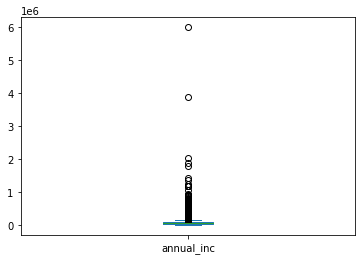

In [53]:
df_filtered['annual_inc'].plot(kind='box')


It is evivent that there are some outliers in the column and need to be removed.



<AxesSubplot:>

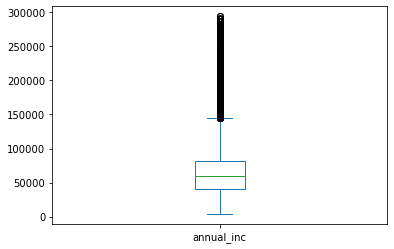

In [54]:
df_filtered[df_filtered['annual_inc']<300000]['annual_inc'].plot(kind='box')

In [55]:
df_filtered[df_filtered['annual_inc']>150000].shape


(1535, 19)

From the graph, we can see that even after filtering the data at 99.5th percentile value, there are still many outliers in the column. Hence we decide to remove all the values upto 95th percentile of the column which is roughly 15,00,000



<AxesSubplot:>

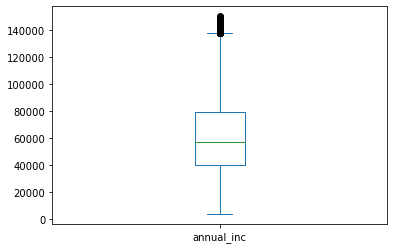

In [56]:
df_filtered[df_filtered['annual_inc']<150000]['annual_inc'].plot(kind='box')


In [57]:
df_filtered = df_filtered[df_filtered['annual_inc']<150000]


In [58]:
df_filtered.shape


(36869, 19)

In [59]:
df_filtered.home_ownership.value_counts()


RENT        18075
MORTGAGE    15969
OWN          2729
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

In [60]:
df_filtered[df_filtered.home_ownership=='NONE']


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
39318,231321,10000,10000,1228.06,36 months,7.75,312.22,A,A3,5 years,NONE,22200.0,Not Verified,Jan-08,Fully Paid,debt_consolidation,VA,5.24,0.0
39659,121568,4000,4000,1925.00,36 months,9.64,128.41,B,B4,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,other,CA,15.00,0.0
39660,121535,2800,2800,1625.00,36 months,8.70,88.65,B,B1,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,other,MA,15.00,0.0


From above code block, we can see that there are only 3 values in the "None" category of home_ownership. These as well can be termed as outliers and hence need to be dropped



In [61]:
cleaned_data = df_filtered[df_filtered.home_ownership!='NONE']

This completes the data cleaning part of the process.



## Univariate Analysis


Term

<AxesSubplot:>

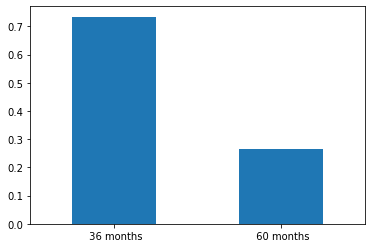

In [62]:
cleaned_data.term.value_counts(normalize=True).plot(kind='bar', rot=0)


### Observation

- More loans have been issued for 36 months as compared to 60 months


### Grade

<AxesSubplot:>

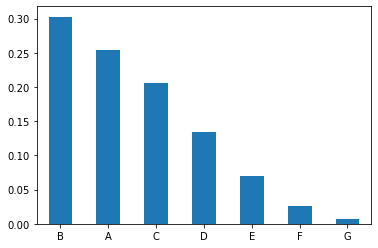

In [64]:
cleaned_data.grade.value_counts(normalize=True).plot(kind='bar', rot=0)

### Sub_grade

<AxesSubplot:>

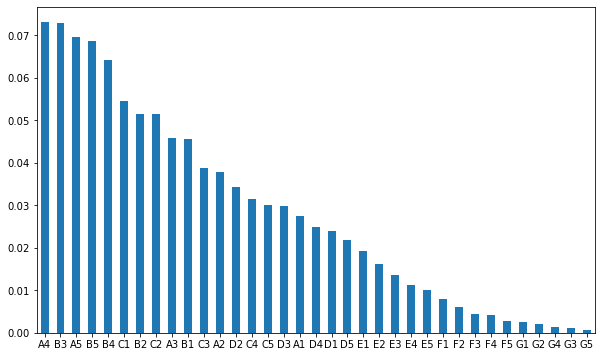

In [65]:
cleaned_data.sub_grade.value_counts(normalize=True).plot(kind='bar', rot=0, figsize = [10,6])

### home_ownership


<AxesSubplot:>

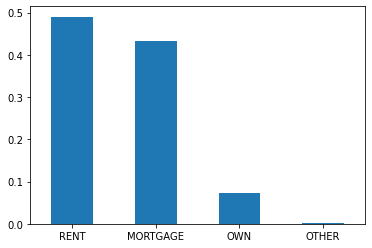

In [66]:
cleaned_data.home_ownership.value_counts(normalize=True).plot(kind='bar', rot=0)

### Observation

- The data of home_ownership column is highly skewed towards to categories


### Purpose

<AxesSubplot:>

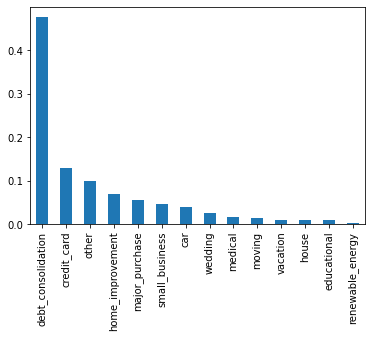

In [68]:
cleaned_data.purpose.value_counts(normalize=True).plot(kind='bar')


### Observation

- The data of purpose column is highly skewed


<AxesSubplot:>

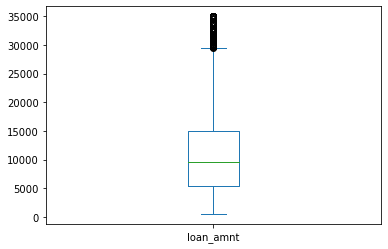

In [70]:
cleaned_data.loan_amnt.plot(kind='box')


<AxesSubplot:>

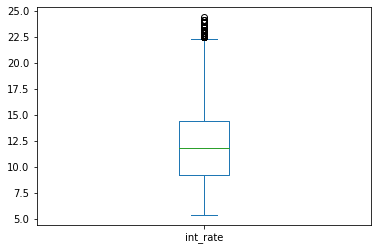

In [71]:
cleaned_data.int_rate.plot(kind='box')


<AxesSubplot:>

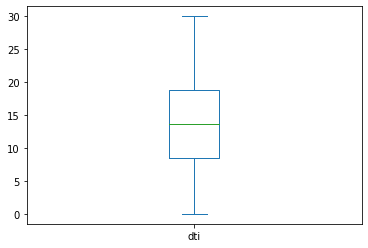

In [72]:
cleaned_data.dti.plot(kind='box')


<AxesSubplot:>

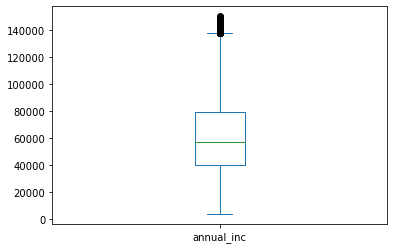

In [73]:
cleaned_data.annual_inc.plot(kind='box')


## Bivariate analysis


In [74]:
cleaned_data.loan_status.value_counts()

Fully Paid     30636
Charged Off     5213
Current         1017
Name: loan_status, dtype: int64

- Based on the problem statement provided, we need to identify the factors responsible for loan defaults. The column loan_status indicates whether the customer has defaulted(Charged Off), fully paid or has an active loan with the lending institution. As the customers with active loan are neither defaulters not non-defaulters, we cannot consider them for analysis. Hence we will be removing these datapoints.

In [76]:
cleaned_data = cleaned_data[cleaned_data.loan_status!='Current']

### Default rate


- In order to find if the variable is a good predictor, we need to calculate the default rate.
- It is calculated by using the formula Default_rate(%) = (Count of charged off cases)/(Total loans issued)*100

In [78]:
def calc_default_rate(table):
    table = table.reset_index()
    table['Total Cases'] = (table['Charged Off']+table['Fully Paid'])
    table['default_rate'] = (table['Charged Off']/(table['Charged Off']+table['Fully Paid']))*100
    
    return table


### Analysing default rate for loan amount column


In order to analyse the default rate, we need to plot a frequency distribution table, which we will be doing using pivot table

As the column is numerical, we need to perform binning in order to plot a grap

In [80]:
bins = range(0,35000,5000)
cleaned_data['loan_amt_bin'] = pd.cut(cleaned_data['loan_amnt'], bins)

In [81]:
loan_amt_pvt = pd.pivot_table(cleaned_data, values='id', index=['loan_amt_bin'],columns=['loan_status'], aggfunc='count')

In [82]:
loan_amt_pvt

loan_status,Charged Off,Fully Paid
loan_amt_bin,,
"(0, 5000]",1210,7721
"(5000, 10000]",1542,10590
"(10000, 15000]",995,6240
"(15000, 20000]",713,3296
"(20000, 25000]",478,1939
"(25000, 30000]",124,457


In [83]:
loan_amt_pvt = calc_default_rate(loan_amt_pvt)


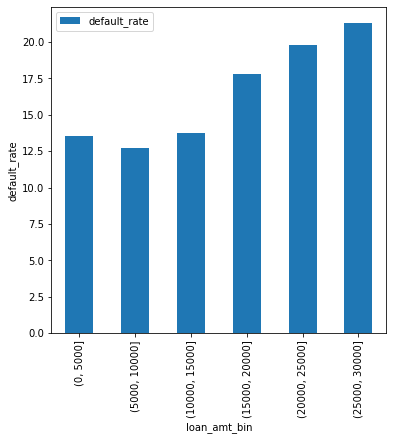

In [84]:
fig = loan_amt_pvt.plot(kind='bar', x='loan_amt_bin', y='default_rate', ylabel='default_rate', figsize=[6,6]).get_figure()


In [85]:
fig.savefig('loan_amnt_analysis.png')


### Inference


- We can see that as the loan amount is increasing, so is the default rate. Hence we can say that loan_amnt is a driver variable


### Analysing default rate for column grade


In [88]:
grade_pvt = pd.pivot_table(cleaned_data, values='id', index=['grade'],columns=['loan_status'], aggfunc='count')

In [89]:
grade_pvt = calc_default_rate(grade_pvt)

In [90]:
grade_pvt


loan_status,grade,Charged Off,Fully Paid,Total Cases,default_rate
0,A,550,8770,9320,5.901288
1,B,1312,9537,10849,12.093280
2,C,1269,6083,7352,17.260609
3,D,1052,3707,4759,22.105484
4,E,649,1777,2426,26.751855
5,F,286,589,875,32.685714
6,G,95,173,268,35.447761


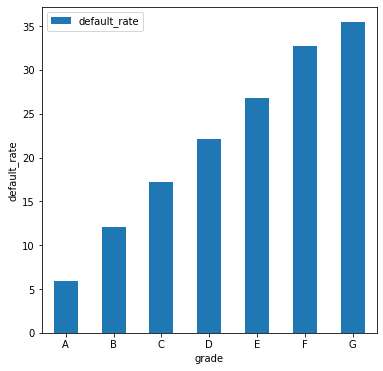

In [91]:
fig = grade_pvt.plot(kind='bar', x='grade', y='default_rate', ylabel='default_rate', rot=0,figsize=[6,6]).get_figure()

In [92]:
fig.savefig('grade_analysis.png')

### Inference

As the grade increases from A to G, the default_rate goes on increasing. Hence we can say that grade is good predictor.



### Analysing Default rate of Emp_length


In [94]:
emp_length_pivot = pd.pivot_table(cleaned_data, values='id', index=['emp_length'],columns=['loan_status'], aggfunc='count')


In [95]:
emp_length_pivot


loan_status,Charged Off,Fully Paid
emp_length,,
1 year,451,2608
10+ years,1279,6675
2 years,548,3575
3 years,537,3307
4 years,445,2773
5 years,441,2617
6 years,297,1785
7 years,252,1396
8 years,194,1156


In [96]:
emp_length_pivot = calc_default_rate(emp_length_pivot)

In [97]:
emp_length_pivot

loan_status,emp_length,Charged Off,Fully Paid,Total Cases,default_rate
0,1 year,451,2608,3059,14.743380
1,10+ years,1279,6675,7954,16.079960
2,2 years,548,3575,4123,13.291293
3,3 years,537,3307,3844,13.969823
4,4 years,445,2773,3218,13.828465
5,5 years,441,2617,3058,14.421190
6,6 years,297,1785,2082,14.265130
7,7 years,252,1396,1648,15.291262
8,8 years,194,1156,1350,14.370370
9,9 years,151,1008,1159,13.028473


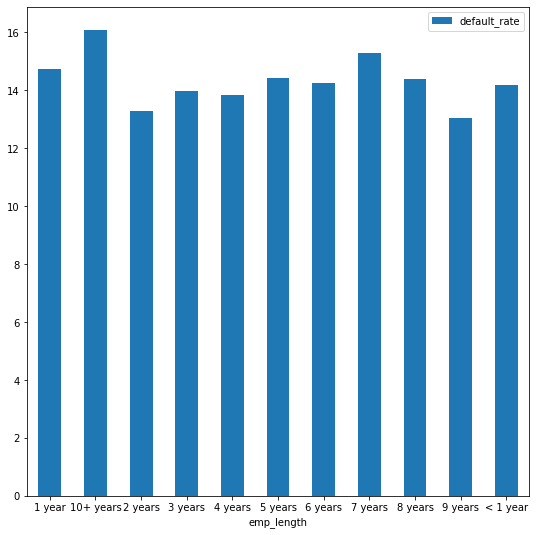

In [99]:
fig = emp_length_pivot.plot(kind='bar', x='emp_length', y='default_rate', rot=0,figsize=[9,9]).get_figure()

### Inference

As values of all the segments of emp_length is roughly same, we can say that emp_length is not a good predictor



### Analysing default rate of interest_rate


In [100]:
bins = range(0,24,4)
cleaned_data['int_rate_bins'] = pd.cut(cleaned_data['int_rate'], bins=bins)

In [101]:
int_rate_pvt = pd.pivot_table(cleaned_data, values='id', index=['int_rate_bins'],columns=['loan_status'], aggfunc='count')

In [102]:
int_rate_pvt = calc_default_rate(int_rate_pvt)

In [103]:
int_rate_pvt

loan_status,int_rate_bins,Charged Off,Fully Paid,Total Cases,default_rate
0,"(0, 4]",0,0,0,NaN
1,"(4, 8]",395,7200,7595,5.200790
2,"(8, 12]",1348,10235,11583,11.637745
3,"(12, 16]",2042,9702,11744,17.387602
4,"(16, 20]",1162,3091,4253,27.321890


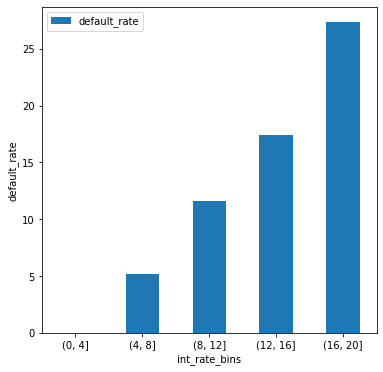

In [104]:
fig = int_rate_pvt.plot(kind='bar', x='int_rate_bins', y='default_rate',ylabel = 'default_rate',rot=0,figsize=[6,6]).get_figure()


In [105]:
fig.savefig('interest_rate_plot.png')

### Analysing default rate for dti column


In [107]:
bins = range(0,30,5)
cleaned_data['dti_bins'] = pd.cut(cleaned_data['dti'], bins)

In [108]:
dti_pvt = pd.pivot_table(cleaned_data, values='id', index=['dti_bins'],columns=['loan_status'], aggfunc='count')


In [109]:
dti_pvt

loan_status,Charged Off,Fully Paid
dti_bins,,
"(0, 5]",542,3791
"(5, 10]",911,6196
"(10, 15]",1301,7696
"(15, 20]",1301,7059
"(20, 25]",1053,5248


In [110]:
dti_pvt = calc_default_rate(dti_pvt)

In [111]:
dti_pvt

loan_status,dti_bins,Charged Off,Fully Paid,Total Cases,default_rate
0,"(0, 5]",542,3791,4333,12.508655
1,"(5, 10]",911,6196,7107,12.818348
2,"(10, 15]",1301,7696,8997,14.460376
3,"(15, 20]",1301,7059,8360,15.562201
4,"(20, 25]",1053,5248,6301,16.711633


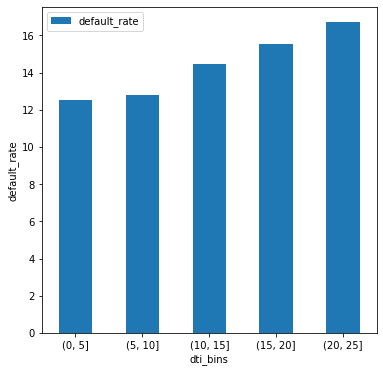

In [112]:
fig = dti_pvt.plot(kind='bar', x='dti_bins', y='default_rate',ylabel = 'default_rate',rot=0,figsize=[6,6]).get_figure()

In [113]:
fig.savefig('dti_plot.png')

### Inference

As dti is emi_obligation divided by income, as the numerator increases or denomiator decreases so does default rate. Hence we can say that as the dti increases, so does default rate. We can say that this is a good predictor for default rate.

### Analyzing default rate for column Annual income

In [114]:
bins = range(0,120000,10000)
cleaned_data['annual_inc_bins'] = pd.cut(cleaned_data['annual_inc'], bins=bins)

In [115]:
annual_inc_pvt = pd.pivot_table(cleaned_data, values='id', index=['annual_inc_bins'],columns=['loan_status'], aggfunc='count')

In [116]:
annual_inc_pvt = calc_default_rate(annual_inc_pvt)

In [117]:
annual_inc_pvt


loan_status,annual_inc_bins,Charged Off,Fully Paid,Total Cases,default_rate
0,"(0, 10000]",17,58,75,22.666667
1,"(10000, 20000]",174,760,934,18.629550
2,"(20000, 30000]",561,2612,3173,17.680429
3,"(30000, 40000]",860,4096,4956,17.352704
4,"(40000, 50000]",826,4713,5539,14.912439
5,"(50000, 60000]",849,4613,5462,15.543757
6,"(60000, 70000]",545,3481,4026,13.537009
7,"(70000, 80000]",457,3022,3479,13.135959
8,"(80000, 90000]",299,2179,2478,12.066182
9,"(90000, 100000]",222,1765,1987,11.172622


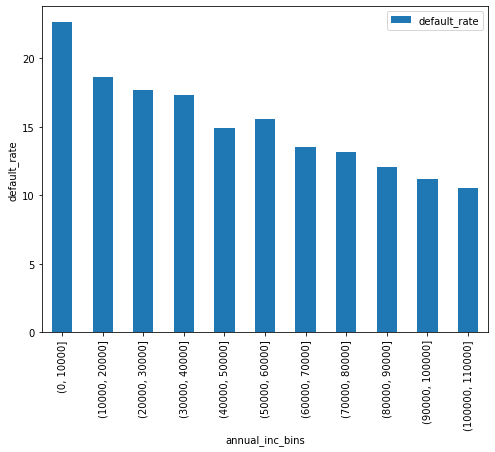

In [118]:
fig = annual_inc_pvt.plot(kind='bar', x='annual_inc_bins', y='default_rate',ylabel = 'default_rate',figsize=[8,6]).get_figure()

In [119]:
fig.savefig('annual_inc_plot.png')

### Inference

- It is clearly evident from the plot that as lower the annual income, higher the chance of default.



## Recommenation


- Annual income of the customer has a high influence on determining whether the customer is likely to default or not. Lower the annual income, higher the chance of default.


- Interest rate is also a good driver variable in determining if the customer is likely to default. Higher the interest rate, higher chance of default.


- Grade is one of the best variable to predict default. Giving loan to E, F and G category can be one of a good ways to reduce default.

- dti(debt to income ratio) shows a good trend of increasing default with increase in dti. As debt increases or income decreases, the customer is more likely to default


- Loan amount should be carefully decided as we can see that higher loan amount segments have higher default rate.